# Plateforme Agnostique de Traitement et d'Analyse des Textes
### Carnet d'expérimentation
---

## Sujet : Theme  : Recherche de lemmes clefs


---

## Observations et environnement
---

In [1]:
cd ../..

/Users/fm/Desktop/Work/Patat


In [3]:
import importlib
import pandas as pd
#import seaborn as sns

### Chargement des données

In [4]:
article_filename = ''

In [5]:
import patat.db.article_db
article_db = patat.db.article_db.ArticleDb(article_filename)
article_db.df()

,url,title,article,site,author,date_iso,url_h,c_count
0,https://reseauinternational.net/tous-les-jeune...,"Tous les jeunes, portez la nouvelle (russe)",par Pepe Escobar.\nL’OCS à Samarcande et l’Ass...,reseauinternational.net,NaN,2022-09-30T00:00:00,f95a294c94ff76cc9626ae06300a8b38067f89cf,10366.0
1,https://reseauinternational.net/adhesion-a-la-...,Adhésion à la Russie : 93% pour le « oui » dan...,"Dans les régions de Zaporijia et de Kherson, 9...",reseauinternational.net,NaN,2022-09-30T00:00:00,c924dab7ded47578d81c3ae46f8be0964b3c50f1,1607.0
2,https://lemediaen442.fr/onu-le-premier-ministr...,ONU – Le Premier ministre de Nouvelle-Zélande ...,L’argument principal de la ministre est que le...,lemediaen442.fr,NaN,2022-09-29T00:00:00,3d47a59ef99274fd9ee96c209cc2ab41d6e1f6bb,1444.0
3,https://www.francesoir.fr/societe-environnemen...,Compostage humain: les “funérailles vertes” ga...,"Aux États-Unis, les différents gouvernements r...",www.francesoir.fr,Auteur(s)\nFranceSoir,2022-09-28T13:15:00,0c0341a1f5fae820ee307cb54024df6b06a93d85,4040.0
4,https://www.breizh-info.com/2022/09/27/208410/...,Donatello : génie de la Renaissance,"Portrait du sculpteur Donatello (1386-1466), p...",www.breizh-info.com,NaN,2022-09-27T00:00:00,fcce819327d0302c4cf5e3a8a43b54327ffb8e63,1145.0
...,...,...,...,...,...,...,...,...
77906,https://www.lelibrepenseur.org/une-histoire-vi...,Une histoire vieille comme le monde !,Certains veulent des preuves ! Ils ont raison....,www.lelibrepenseur.org,Par\nAdmin,2010-05-04T00:00:00,8c7a6ecf46d47da1912884a0c0a2837c69f7ad19,NaN
77907,https://www.lelibrepenseur.org/actus/,Actus,"Dernière vidéo !\nIl était temps, enfin ! Je v...",www.lelibrepenseur.org,Par\nuser,2007-07-07T00:00:00,d4d5a37a8ff545664bea75664c8d8695e70d0941,NaN
77908,https://www.lelibrepenseur.org/affiche-des-dec...,Affiche des décès et malaises de sportifs de h...,Un nombre inquiétant de sportifs de haut nivea...,www.lelibrepenseur.org,NaN,NaN,a175027896cf79e76dfad6409694fafacf1919b3,NaN
77909,https://www.lelibrepenseur.org/communaute/,Communauté,Notre Réseau Telegram et ses Groupes Secondair...,www.lelibrepenseur.org,NaN,NaN,6ba257c7b15dd68cadf7dc5d6d8c584db0f1792e,NaN


## Expérience
---

In [6]:
df_corpus =article_db.df().copy()

### texte = titre + article en minuscules

In [7]:
df_corpus['text'] = df_corpus['title'] + '\n' + df_corpus['article']

In [8]:
df_corpus['text'] = df_corpus['text'].apply(str.lower)

### Suppression Articles courts et longs

In [9]:
df_corpus['c_count'] = df_corpus['text'].apply(len)

In [10]:
df_corpus = df_corpus[df_corpus['c_count']<20000]

In [11]:
df_corpus = df_corpus[df_corpus['c_count']>=500]

In [12]:
sns.displot(df_corpus,x='c_count')

NameError: name 'sns' is not defined

In [13]:
df_corpus.shape

(76602, 9)

### Lemmatization Corpus

In [14]:
from patat.ml.lex_analyser import LexAnalyser

In [15]:
lex = LexAnalyser()

In [16]:
df_corpus['w_list'] = df_corpus['text'].apply(lex.get_words).copy()

In [17]:
df_corpus['l_list'] = df_corpus['w_list'].apply(lex.get_lemmas).copy()

In [18]:
df_corpus['w_count'] = df_corpus['w_list'].apply(len) 

In [19]:
sns.displot(df_corpus,x='w_count')

NameError: name 'sns' is not defined

### Choix du thème et des mots associés

#### Covid

In [19]:
theme_lemmas = lex.get_lemmas(['covid','vaccin','vaccination'])

In [20]:
theme_lemmas

['covid', 'vaccin', 'vaccination']

### theme_score

In [21]:
def theme_score(lemmas: list):
    score = 0
    for lemma in theme_lemmas:
        score = score + lemmas.count(lemma)
    return score

In [22]:
df_corpus['theme_score'] = df_corpus['l_list'].apply(theme_score)

In [23]:
df_corpus.sort_values('theme_score',ascending=False).head()

,url,title,article,site,author,date_iso,url_h,c_count,text,w_list,l_list,w_count,theme_score
55598,https://fr.sott.net/article/37739-Les-deces-as...,Les décès associés aux vaccins anti-Covid sont...,Note LHK : Nous avions déjà partagé un texte d...,fr.sott.net,NaN,NaN,a2833bf86e48591ae1118a1196c4423799a2aac1,18992,les décès associés aux vaccins anti-covid sont...,"[les, décès, associés, aux, vaccins, anti, cov...","[les, décès, associer, aux, vaccin, anti, covi...",2705,133
55959,https://fr.sott.net/article/39231-C-est-une-bo...,C'est une bombe à retardement !!! Les données ...,Une enquête approfondie sur 5 mois de données ...,fr.sott.net,NaN,NaN,7476fef92d4c7335dad03b40c34b53133c7b7c68,16842,c'est une bombe à retardement !!! les données ...,"[est, une, bombe, retardement, les, données, o...","[est, une, bombe, retardement, les, donner, of...",2466,105
59640,https://lezarceleurs.blogspot.com/2021/04/le-c...,Le COVID au fil des jours de Le Media en 4-4-2,https://lemediaen442.fr/covid-19-et-vaccins/FI...,lezarceleurs.blogspot.com,NaN,NaN,a752351b84aff6b1f2dc16a9f8b1b9890670f0fb,11431,le covid au fil des jours de le media en 4-4-...,"[le, covid, au, fil, des, jours, de, le, media...","[le, covid, au, fil, des, jour, de, le, media,...",1467,103
69288,https://www.francesoir.fr/politique-monde/ques...,Questions brûlantes que le Parlement européen ...,Nous reproduisons un article de Senta Depuydt ...,www.francesoir.fr,NaN,NaN,6149bbd74a5c842e240fc18bf06d435c6aa78aba,18079,questions brûlantes que le parlement européen ...,"[questions, brûlantes, que, le, parlement, eur...","[question, brûlant, que, le, parlement, europé...",2689,100
60669,https://lezarceleurs.blogspot.com/2022/05/la-s...,La sécurité des vaccins COVID de Pfizer varie ...,De : https://www.theepochtimes.com/pfizer-covi...,lezarceleurs.blogspot.com,NaN,NaN,cab357767492dacc70ac82ee073bf35d5fbcb27c,16826,la sécurité des vaccins covid de pfizer varie ...,"[la, sécurité, des, vaccins, covid, de, pfizer...","[la, sécurité, des, vaccin, covid, de, pfizer,...",2507,94


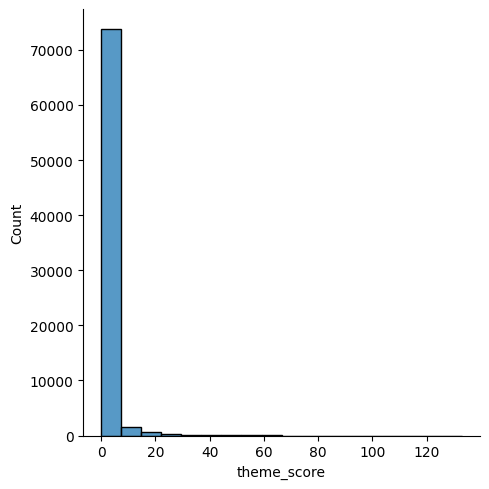

In [24]:
sns.displot(df_corpus,x='theme_score')

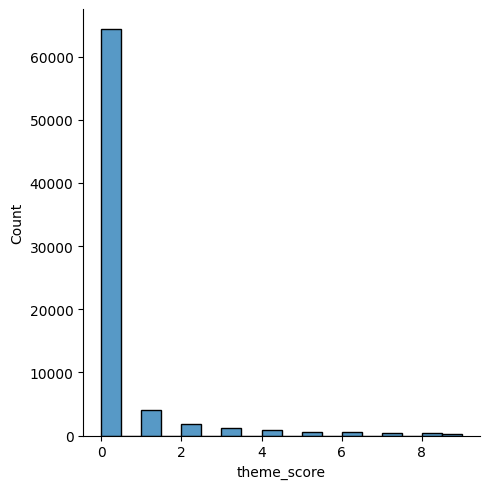

In [35]:
sns.displot(df_corpus[df_corpus['theme_score']<10],x='theme_score')

In [33]:
# Seuil à partir duquel on considère que l'article est dans le thème
#score_threshold = 1
score_threshold = 2

In [36]:
df_corpus['theme']=df_corpus['theme_score'].apply(lambda s : 1 if s>=score_threshold else 0)

### Recherche de Lemmes Communs

In [28]:
%%time
df_corpus['l_text'] = df_corpus['l_list'].apply(' '.join)

CPU times: user 1.04 s, sys: 41.4 ms, total: 1.09 s
Wall time: 725 ms


In [ ]:
df_corpus.memory_usage(deep=True)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
%%time
vectorizer = CountVectorizer(token_pattern=r'[^\d\W]+')
X = vectorizer.fit_transform(df_corpus['article'])
vectorizer.get_feature_names_out()

In [ ]:
X.shape

In [ ]:
df_X = pd.DataFrame(X.toarray())

In [ ]:
names = vectorizer.get_feature_names_out()
col_names={}
for i in range(0,len(names)):
    col_names[i]=names[i]


In [ ]:
df_X.rename

In [ ]:
%%time
lemmas_0 = []
lemmas_1 = []
for index,row in df_corpus.head(10000).iterrows():
    if row['theme']>0 :
        lemmas_1 = lemmas_1 + row['l_list']
    else:
        lemmas_0 = lemmas_0 + row['l_list']        

In [ ]:
%%time
#lemmas_0 = df_corpus[df_corpus['theme']==0]['l_list'].sum()

In [ ]:
%%time
#lemmas_1 = df_corpus[df_corpus['theme']==1]['l_list'].sum()

In [ ]:
common_words = lex.get_common_words(lemmas_0, lemmas_1, common_size=200)
common_words

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [ ]:
def display_wc(text,commonwords):
    wordcloud = WordCloud(background_color = 'white', stopwords = commonwords, max_words = 50, regexp=r"\w\w+").generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show();

In [ ]:
display_wc('\n'.join(df_corpus[df_corpus['covid']==1]['lemma_text']),common_words)

In [ ]:
display_wc('\n'.join(df_corpus[df_corpus['covid']==0]['lemma_text']),common_words)

In [ ]:
df_count  = pd.DataFrame.from_dict(counter, orient='index')

In [ ]:
df_count = df_count.rename(columns={0:'count'})

In [ ]:
df_count.shape

In [ ]:
common_words = list(df_count.sort_values('count',ascending=False).head(500).index)

In [ ]:
common_words

## Mesure et observation des résultats
---

## Sauvegarde des résultats
---

## Conclusions
---

- Résultat : OK

## Bricolages
---

In [29]:
df = df_corpus.sample(10000, random_state=42).copy()

In [30]:
%%time
text = df['l_text'].sum()

CPU times: user 22.2 s, sys: 51.9 s, total: 1min 14s
Wall time: 1min 14s


In [37]:
df_1 = df_corpus[df_corpus['theme']==1]

In [38]:
df_1.shape

(8290, 15)

In [39]:
%%time
text = df_1['l_text'].sum()

CPU times: user 24.3 s, sys: 1min 4s, total: 1min 29s
Wall time: 1min 29s


In [41]:
text_1 = text

In [40]:
df_0 = df_corpus[df_corpus['theme']==0].sample(8000, random_state=42)

In [42]:
%%time
text_0 = df_0['l_text'].sum()

CPU times: user 14.6 s, sys: 36.6 s, total: 51.1 s
Wall time: 51.1 s


In [44]:
lemmas_0 = lex.get_words(text_0)

In [45]:
lemmas_1 = lex.get_words(text_1)

In [46]:
ignore_words = lex.get_ignore_words(lemmas_0,lemmas_1)

In [48]:
len(ignore_words)

94408

In [53]:
ignore_words[-500:]

['parcé',
 'kerhor',
 'ilun',
 'rétinal',
 'rétiniens',
 'torsader',
 'icifive',
 'pinnacle',
 'departed',
 'deploying',
 'hobnail',
 'poetic',
 'creatively',
 'linguistics',
 'hollands',
 'fuelled',
 'naustdalslid',
 'dictionary',
 'ludicrously',
 'speculations',
 'guesses',
 'shakespearean',
 'contemporaries',
 'linguist',
 'denoting',
 'thou',
 'usurp',
 'reflects',
 'jonson',
 'jealous',
 'snooty',
 'playwrights',
 'guardamagna',
 'greatersaint',
 'tamanrasset',
 'insalah',
 'biskra',
 'béatifier',
 'dissolu',
 'sénoussis',
 'herodoteligue',
 'tokad',
 'akomod',
 'bennozh',
 'huchal',
 'aduerien',
 'avel',
 'treiñ',
 'vretoned',
 'houlzadoù',
 'olympiakos',
 'hres',
 'qarabağ',
 'dañjerusañ',
 'ganaried',
 'dañjer',
 'klub',
 'feyenoord',
 'betis',
 'sévilla',
 'trugarez',
 'fcn',
 'frap',
 'origineirak',
 'geologist',
 'pottery',
 'arar',
 'kqymh',
 'ucjk',
 'cunéiforme',
 'ishtar',
 'mésopotamien',
 'ileana',
 'ovalle',
 'pshhxegqop',
 'ofowkqz',
 'exempleoscar',
 'marlee',
 'mat

In [70]:
df_corpus[df_corpus['text'].str.contains(r"drouâte")]

,url,title,article,site,author,date_iso,url_h,c_count,text,w_list,l_list,w_count,theme_score,theme,l_text
100,https://reseauinternational.net/pays-bas-myste...,Pays-Bas : Mystérieux excès de mortalité en 2022,par Covidémence.\nIl se passe quelque chose de...,reseauinternational.net,NaN,2022-09-26T00:00:00,a983ce277eeb70584af67a3296ebbddd450ae596,3400,pays-bas : mystérieux excès de mortalité en 20...,"[pays, bas, mystérieux, excès, de, mortalité, ...","[pays, bas, mystérieux, excès, de, mortalité, ...",529,3,1,pays bas mystérieux excès de mortalité en par ...
72485,https://www.profession-gendarme.com/ca-restera...,"« Ça restera dans les anales. » Épisode 9, 23 ...",Coccyx Grue 613 abonnés « Ça restera dans les ...,www.profession-gendarme.com,NaN,NaN,eb9dcad0b17d15dbf04502320c2c28c80fd92390,623,"« ça restera dans les anales. » épisode 9, 23 ...","[ça, restera, dans, les, anales, épisode, avri...","[ça, rester, dans, les, anal, épisode, avril, ...",83,0,0,ça rester dans les anal épisode avril la minut...
72995,https://www.profession-gendarme.com/epidemie-d...,Epidémie de problèmes cardiaques chez des spor...,Publié le 15 octobre 2021 par Olivier Demeulen...,www.profession-gendarme.com,NaN,NaN,7b0461c617b52f02978bf933d096788609ccf2ba,2064,epidémie de problèmes cardiaques chez des spor...,"[epidémie, de, problèmes, cardiaques, chez, de...","[epidémie, de, problème, cardiaque, chez, des,...",321,1,0,epidémie de problème cardiaque chez des sporti...
73274,https://www.profession-gendarme.com/il-faut-fa...,"« Il faut faire barrage à l’extrême droite, et...",Macron vs Le Pen : La Peste ou l’Eczéma ?\n« O...,www.profession-gendarme.com,NaN,NaN,583c7f7e29d6474ffc8460c155ea5c51a747cd7d,18679,"« il faut faire barrage à l’extrême droite, et...","[il, faut, faire, barrage, extrême, droite, et...","[il, falloir, faire, barrage, extrême, droit, ...",2998,4,1,il falloir faire barrage extrême droit et extr...
73438,https://www.profession-gendarme.com/la-confian...,"La confiance n’exclut pas le contrôle, mais le...",Résultats du 2e tour de la présidentielle et c...,www.profession-gendarme.com,NaN,NaN,304cc1440efc9d38b2cec01186dec56d0e230e80,17249,"la confiance n’exclut pas le contrôle, mais le...","[la, confiance, exclut, pas, le, contrôle, mai...","[la, confiance, exclure, pas, le, contrôle, ma...",2753,0,0,la confiance exclure pas le contrôle mais le c...
74378,https://www.profession-gendarme.com/passe-vaxi...,« Passe vaxinal » : comment les nationaux-covi...,"Pécron, Macresse, Hidalcresse, Taubicron, Jacr...",www.profession-gendarme.com,NaN,NaN,2a18ddb3a3050f2d5175ff64c080c4ae4a43314f,10897,« passe vaxinal » : comment les nationaux-covi...,"[passe, vaxinal, comment, les, nationaux, covi...","[passe, vaxinal, comment, les, national, covid...",1702,2,1,passe vaxinal comment les national covidistes ...


In [71]:
df_corpus['text'][72485]

'« ça restera dans les anales. » épisode 9, 23 avril 2022. la minute nécessaire de jean-brichèle.\ncoccyx grue 613 abonnés « ça restera dans les anales. » « pas une voix pour l’« extrême drouâteuh » ! la minute nécessaire de jean-brichèle, première iel en direct de l’élysée (montmartre). épisode 9, 23 avril 2022 caméra / réalisation / montage : mimi makrell merci à françois pour le générique troupier http://www.altersexualite.com/spip.ph… perruques jaunes : https://t.me/perruquesjaunes mensonges à l’élysée : http://pressibus.org/gen/trogneux/ind… luís de camões : http://www.altersexualite.com/spip.ph…\nsource : youtube'

In [67]:
import patat.util.file

In [69]:
patat.util.file.text_save('\n'.join(ignore_words),'data/tmp/221018-IgnoreWords.csv')